In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import sys
import os
from PIL import Image
import json
# import pydot
# import graphviz
import time
import pickle
# import re
import pandas as pd 
import seaborn as sns # for making plots with seaborn
color = sns.color_palette()
import warnings
warnings.filterwarnings("ignore")

/home/tina_agarwal/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
tf.__version__


'1.10.1'

In [3]:
tf.keras.__version__


'2.1.6-tf'

In [4]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 5273510701828939131
]


In [5]:
os.path.abspath('.')


'/home/tina_agarwal'

In [7]:
annotation_zip = tf.keras.utils.get_file('annotations.zip',
                                         cache_subdir=os.path.abspath('.')+'/data/',
                                         origin = 'https://lilablobssc.blob.core.windows.net/caltechcameratraps/labels/caltech_images_20190919.json.zip',
                                         extract = True)

In [3]:
image_zip = tf.keras.utils.get_file('images.zip',
                                         cache_subdir=os.path.abspath('.')+'/data1/',
                                         origin = 'https://lilablobssc.blob.core.windows.net/caltechcameratraps/cct_images.tar.gz',
                                         extract = True)

112540770304/112540764160 [==============================] - 7342s 0us/step


In [6]:
with open("data/caltech_images_20190919.json", 'r') as f:
    annotations = json.load(f)

### What's in the json file

In [7]:
annotations['info']

{'year': 2018,
 'contributor': 'Sara Beery',
 'date_created': '2018-07-03 18:34:36.573636',
 'version': 'Caltech Camera Traps',
 'description': 'Database of camera trap images collected from the NPS and the USGS with help from Justin Brown and Erin Boydston'}

In [8]:
annotations['categories']

[{'name': 'bobcat', 'id': 6},
 {'name': 'opossum', 'id': 1},
 {'name': 'empty', 'id': 30},
 {'name': 'coyote', 'id': 9},
 {'name': 'raccoon', 'id': 3},
 {'name': 'bird', 'id': 11},
 {'name': 'dog', 'id': 8},
 {'name': 'cat', 'id': 16},
 {'name': 'squirrel', 'id': 5},
 {'name': 'rabbit', 'id': 10},
 {'name': 'skunk', 'id': 7},
 {'name': 'lizard', 'id': 14},
 {'name': 'rodent', 'id': 99},
 {'name': 'badger', 'id': 21},
 {'name': 'deer', 'id': 34},
 {'name': 'cow', 'id': 37},
 {'name': 'car', 'id': 33},
 {'name': 'fox', 'id': 51},
 {'name': 'pig', 'id': 39},
 {'name': 'mountain_lion', 'id': 40},
 {'name': 'bat', 'id': 66},
 {'name': 'insect', 'id': 97}]

In [9]:
annotations['images'][0]

{'seq_num_frames': 1,
 'date_captured': '2013-10-04 13:31:53',
 'seq_id': '6f2160eb-5567-11e8-990e-dca9047ef277',
 'height': 1494,
 'width': 2048,
 'location': 26,
 'rights_holder': 'Erin Boydston',
 'file_name': 'train_val/5968c0f9-23d2-11e8-a6a3-ec086b02610b.jpg',
 'id': '5968c0f9-23d2-11e8-a6a3-ec086b02610b',
 'frame_num': 1}

In [10]:
annotations['annotations'][0]

{'id': '207268a3-7d5b-11e7-884d-7845c41c2c67',
 'category_id': 6,
 'image_id': '58d61304-23d2-11e8-a6a3-ec086b02610b'}

In [11]:
print(len(annotations['images']))
print(len(annotations['annotations']))
print(len(annotations['categories']))

243100
245118
22


In [12]:
!ls data1/cct_images/ -1 | wc -l

244584


### Get annotation and image dataframe from json

In [13]:
annot_df = pd.DataFrame.from_dict(annotations['annotations'])

In [14]:
annot_df.head()

category_id                                    id  \
0            6  207268a3-7d5b-11e7-884d-7845c41c2c67   
1            1  207268a4-7d5b-11e7-884d-7845c41c2c67   
2           30  207268a5-7d5b-11e7-884d-7845c41c2c67   
3            9  207268a6-7d5b-11e7-884d-7845c41c2c67   
4            3  207268a7-7d5b-11e7-884d-7845c41c2c67   

                               image_id  
0  58d61304-23d2-11e8-a6a3-ec086b02610b  
1  58e59acd-23d2-11e8-a6a3-ec086b02610b  
2  58a6e5f1-23d2-11e8-a6a3-ec086b02610b  
3  58ff0cef-23d2-11e8-a6a3-ec086b02610b  
4  588f67b8-23d2-11e8-a6a3-ec086b02610b

In [15]:
image_df = pd.DataFrame.from_dict(annotations['images'])

In [16]:
image_df.head(10)

date_captured                                          file_name  \
0  2013-10-04 13:31:53  train_val/5968c0f9-23d2-11e8-a6a3-ec086b02610b...   
1  2013-11-04 18:37:07  train_val/5a0b016f-23d2-11e8-a6a3-ec086b02610b...   
2  2012-05-09 07:33:45  train_val/59b93afb-23d2-11e8-a6a3-ec086b02610b...   
3  2012-03-29 02:34:13  train_val/59641f56-23d2-11e8-a6a3-ec086b02610b...   
4  2012-05-08 19:23:36  train_val/5a1e5306-23d2-11e8-a6a3-ec086b02610b...   
5  2012-01-06 10:57:00  train_val/5a096955-23d2-11e8-a6a3-ec086b02610b...   
6  2014-06-27 08:29:02  train_val/59b93a3b-23d2-11e8-a6a3-ec086b02610b...   
7  2012-09-29 18:14:45  train_val/5a217843-23d2-11e8-a6a3-ec086b02610b...   
8  2011-11-29 17:28:26  train_val/5a2176e7-23d2-11e8-a6a3-ec086b02610b...   
9  2014-04-22 15:17:36  train_val/59cb3a1e-23d2-11e8-a6a3-ec086b02610b...   

   frame_num  height                                    id  location  \
0          1    1494  5968c0f9-23d2-11e8-a6a3-ec086b02610b        26   
1          1    1494  5a0b016f-23d2-11e8-a6a3-ec086b02610b        26   
2          2    1494  59b93afb-23d2-11e8-a6a3-ec086b02610b        38   
3          2    1494  59641f56-23d2-11e8-a6a3-ec086b02610b        38   
4          2    1494  5a1e5306-23d2-11e8-a6a3-ec086b02610b        33   
5          1    1536  5a096955-23d2-11e8-a6a3-ec086b02610b        36   
6          2    1494  59b93a3b-23d2-11e8-a6a3-ec086b02610b        61   
7          1    1494  5a217843-23d2-11e8-a6a3-ec086b02610b        41   
8          2    1494  5a2176e7-23d2-11e8-a6a3-ec086b02610b        38   
9          1    1494  59cb3a1e-23d2-11e8-a6a3-ec086b02610b        26   

   rights_holder                                seq_id  seq_num_frames  width  
0  Erin Boydston  6f2160eb-5567-11e8-990e-dca9047ef277               1   2048  
1  Erin Boydston  6f27ed66-5567-11e8-9e92-dca9047ef277               1   2048  
2   Justin Brown  6f04895c-5567-11e8-a3d6-dca9047ef277               3   2048  
3   Justin Brown  6f0385b5-5567-11e8-a80b-dca9047ef277               3   2048  
4   Justin Brown  6f0a3ccf-5567-11e8-92fb-dca9047ef277               3   2048  
5  Erin Boydston  70096335-5567-11e8-a99a-dca9047ef277               1   2048  
6   Justin Brown  7013c982-5567-11e8-be89-dca9047ef277               3   2048  
7   Justin Brown  70115511-5567-11e8-a1fd-dca9047ef277               3   2048  
8   Justin Brown  6f011019-5567-11e8-a650-dca9047ef277               3   2048  
9  Erin Boydston  6f34ad07-5567-11e8-9e2b-dca9047ef277               1   2048

In [17]:
image_df.shape

(243100, 10)

In [18]:
annot_df.shape

(245118, 3)

### Why are there duplicate annotations?


In [19]:
# 243100 unique annotations - same as the images
annot_df['image_id'].nunique()

243100

In [20]:
dup_list = annot_df[annot_df['image_id'].duplicated()]['image_id']

In [21]:
annot_df[annot_df['image_id'].isin(dup_list)].sort_values(by=['image_id'])

# sometimes the duplicate annotations have the same category, sometimes not
# need to look at a few images..

category_id                                    id  \
34276             3                                 26086   
34275             3                                 26085   
42849             6  db10e7e8-05ea-11e8-b642-dca9047ef277   
42850            10  29cec31f-a2c8-4992-b362-9eece84c9555   
60186             8                                 26253   
60187             8                                 26254   
42883             6  db10f5cf-05ea-11e8-973d-dca9047ef277   
42884            10  3d45bea8-735b-4684-88d9-2358147fa6f4   
24237             3                                 27840   
24236             3                                 27839   
62451             8                                 13051   
62450             8                                 13050   
42870             6  db10f128-05ea-11e8-b62c-dca9047ef277   
42871            10  9d20e01b-9e2b-409b-bcd7-cb3a6ec40c5c   
212884            9  a1481ba8-48a9-4321-9931-6ba92871f7da   
212883            9                                 11677   
63504             3                                 29397   
63505             3                                 29398   
43127            10  7f1aa8eb-dbc0-4587-b0fd-8cfd4c2b46bf   
43126             6  db116807-05ea-11e8-a3ca-dca9047ef277   
56903             3                                 25819   
56902             3                                 25818   
210291            8                                 43483   
210292            8                                 43484   
34934            10                                  8356   
34935            10                                  8357   
41545            11                                 31397   
41544            11                                 31396   
39185             8                                 13280   
39184             8                                 13279   
...             ...                                   ...   
220371           11                                 22189   
220372           11                                 22190   
36613            11                                 14785   
36614            11                                 14786   
22170             3                                  8076   
22171             3                                  8077   
209735            9                                  4140   
209734            9                                  4139   
16174             8                                  6146   
16173             8                                  6145   
12379             3                                 10975   
12378             3                                 10974   
14685             9                                 21949   
14684             9                                 21948   
18217             8                                 18788   
18216             8                                 18787   
21738             3                                  5072   
21739             3                                  5073   
4138             16                                 29895   
4137             16                                 29894   
12198             3                                 20987   
12197             3                                 20986   
21793             3                                 22858   
21792             3                                 22857   
36590             6                                 16809   
36589             6                                 16808   
15209             9                                 20211   
15208             9                                 20210   
22493             6                                  3740   
22492             6                                  3739   

                                    image_id  
34276   5858c0ac-23d2-11e8-a6a3-ec086b02610b  
34275   5858c0ac-23d2-11e8-a6a3-ec086b02610b  
42849   5858c105-23d2-11e8-a6a3-ec086b02610b  
42850   5858c105-23d2-11e8-a6a3-ec086

### Map animal name


In [22]:
category_id = []
category_name = []

for i in annotations['categories']:
    category_id.append(i['id'])
    category_name.append(i['name'])
    
category_dict = dict(zip(category_id, category_name))

In [23]:
for key in sorted(category_dict.keys()):
    print(key, category_dict[key])

1 opossum
3 raccoon
5 squirrel
6 bobcat
7 skunk
8 dog
9 coyote
10 rabbit
11 bird
14 lizard
16 cat
21 badger
30 empty
33 car
34 deer
37 cow
39 pig
40 mountain_lion
51 fox
66 bat
97 insect
99 rodent


In [24]:
annot_df['category_name'] = annot_df['category_id'].map(category_dict)

In [25]:
annot_df.head()

category_id                                    id  \
0            6  207268a3-7d5b-11e7-884d-7845c41c2c67   
1            1  207268a4-7d5b-11e7-884d-7845c41c2c67   
2           30  207268a5-7d5b-11e7-884d-7845c41c2c67   
3            9  207268a6-7d5b-11e7-884d-7845c41c2c67   
4            3  207268a7-7d5b-11e7-884d-7845c41c2c67   

                               image_id category_name  
0  58d61304-23d2-11e8-a6a3-ec086b02610b        bobcat  
1  58e59acd-23d2-11e8-a6a3-ec086b02610b       opossum  
2  58a6e5f1-23d2-11e8-a6a3-ec086b02610b         empty  
3  58ff0cef-23d2-11e8-a6a3-ec086b02610b        coyote  
4  588f67b8-23d2-11e8-a6a3-ec086b02610b       raccoon

### Merge category data to image data

In [26]:
# drop duplicate annotations
annot_df.sort_values("image_id", inplace = True) 
  
# dropping duplicte values 
annot_df_nodup = annot_df.drop_duplicates(subset ="image_id", keep = 'first') 

In [27]:
annot_df_nodup.shape

(243100, 4)

In [28]:
# merge annotation and image data together
image_df.rename(columns={"id": "image_id"}, inplace=True)
image_df.sort_values("image_id", inplace = True) 
image_df_annot = pd.concat([image_df.set_index('image_id'), annot_df_nodup.set_index('image_id')], axis=1, join='inner').reset_index()

In [29]:
image_df_annot.shape

(243100, 13)

In [30]:
image_df_annot.head()

image_id        date_captured  \
0  5858bf1e-23d2-11e8-a6a3-ec086b02610b  2014-07-10 14:20:20   
1  5858bf20-23d2-11e8-a6a3-ec086b02610b  2014-05-26 13:44:00   
2  5858bf21-23d2-11e8-a6a3-ec086b02610b  2014-09-16 08:16:51   
3  5858bf22-23d2-11e8-a6a3-ec086b02610b  2014-05-27 14:57:44   
4  5858bf23-23d2-11e8-a6a3-ec086b02610b  2014-06-06 12:31:06   

                                       file_name  frame_num  height  location  \
0  test/5858bf1e-23d2-11e8-a6a3-ec086b02610b.jpg          1    1494        96   
1  test/5858bf20-23d2-11e8-a6a3-ec086b02610b.jpg          1    1494        96   
2  test/5858bf21-23d2-11e8-a6a3-ec086b02610b.jpg          1    1494       114   
3  test/5858bf22-23d2-11e8-a6a3-ec086b02610b.jpg          1    1494        96   
4  test/5858bf23-23d2-11e8-a6a3-ec086b02610b.jpg          1    1494        96   

   rights_holder                                seq_id  seq_num_frames  width  \
0  Erin Boydston  6fc5ac4a-5567-11e8-b3db-dca9047ef277               1   2048   
1  Erin Boydston  6fbb3c73-5567-11e8-b378-dca9047ef277               1   2048   
2  Erin Boydston  7006f717-5567-11e8-b4c6-dca9047ef277               1   2048   
3  Erin Boydston  6fbd60e3-5567-11e8-a122-dca9047ef277               1   2048   
4  Erin Boydston  6fbf5a47-5567-11e8-9655-dca9047ef277               1   2048   

   category_id                                    id category_name  
0           30  52acca15-7d6d-11e7-884d-7845c41c2c67         empty  
1           30  f77c64a8-7d6e-11e7-884d-7845c41c2c67         empty  
2           10  1aa83e59-7d71-11e7-884d-7845c41c2c67        rabbit  
3           30  45913ae8-7d6d-11e7-884d-7845c41c2c67         empty  
4           30  5f7e6e7a-7d6e-11e7-884d-7845c41c2c67         empty

### Distribution of the Image Categories in the Dataset:

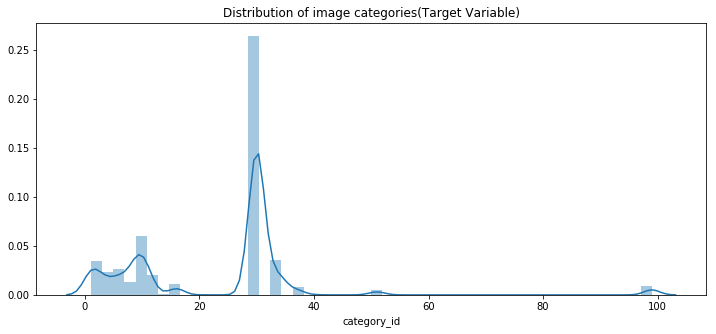

In [31]:
plt.figure(figsize=(12,5))
plt.title("Distribution of image categories(Target Variable)")
ax = sns.distplot(image_df_annot["category_id"])

### Location Distribution in the dataset:

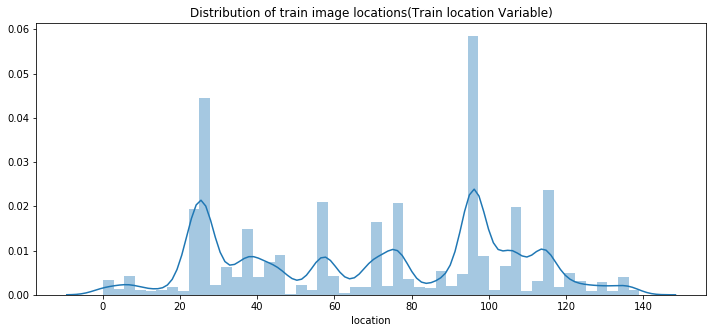

In [32]:
plt.figure(figsize=(12,5))
plt.title("Distribution of train image locations(Train location Variable)")
ax = sns.distplot(image_df_annot["location"])

### Extract Date time info

In [73]:
image_df_annot['date'] = image_df_annot['date_captured'].str.split('\s+').str[0]
image_df_annot['time'] = image_df_annot['date_captured'].str.split('\s+').str[-1]    
image_df_annot['hour'] = pd.to_numeric(image_df_annot['time'].str[:2], errors='coerce')
image_df_annot['date_time'] = pd.to_datetime(image_df_annot['date_captured'], errors='coerce')
image_df_annot["year"] = image_df_annot['date_time'].dt.year
image_df_annot["month"] = image_df_annot['date_time'].dt.month

### How many samples are there in day/night?

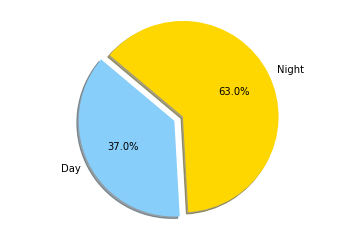

In [77]:
night = image_df_annot[(image_df_annot['hour'] > 19) | (image_df_annot['hour'] < 7)]
day = len(image_df_annot) - len(night)
labels = 'Day', 'Night'
sizes = [len(night), day]
colors = ['lightskyblue','gold']
explode = (0.1, 0) 
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.show()

### Let's check the classes of images

In [35]:
cnt_classes_images = image_df_annot.category_name.nunique()
print("There are {} classes of images".format(cnt_classes_images))
pd.DataFrame(image_df_annot.category_name.value_counts()).transpose()

There are 22 classes of images


empty  opossum  coyote  rabbit   deer  raccoon  bird  bobcat  \
category_name  125745    16634   16348   12345  12191    10981  9521    7952   

                cat   car ...    dog   cow   fox  skunk  lizard  \
category_name  5167  4717 ...   4195  3626  2574   1892     309   

               mountain_lion  badger  insect  bat  pig  
category_name            145      43       6    3    2  

[1 rows x 22 columns]

In [36]:
def plot_classes(feature, fs=8, show_percents=True, color_palette='Set3'):
    f, ax = plt.subplots(1,1, figsize=(2*fs,4))
    total = float(len(image_df_annot))
    g = sns.countplot(image_df_annot[feature], order = image_df_annot[feature].value_counts().index, palette=color_palette)
    g.set_title("Number and percentage of labels for each class of {}".format(feature))
    if(show_percents):
        for p in ax.patches:
            height = p.get_height()
            ax.text(p.get_x()+p.get_width()/2.,
                    height + 3,
                    '{:1.2f}%'.format(100*height/total),
                    ha="center") 
    plt.show()  

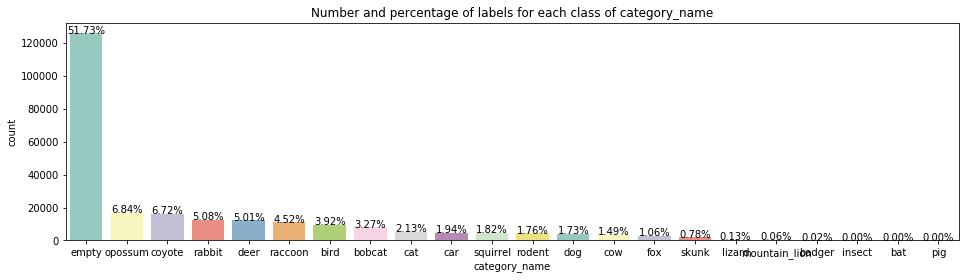

In [37]:
plot_classes('category_name')

Here we see that most of the images are of class empty, followed by opossum, coyote and rabbit. We can see that working with this data is quite difficult. Class imbalance is huge and there are a lot of empty pictures. Also the photos themselves present a challenge - animals can be in a small part of the screen and be obscured.

### Number and percentage of labels for each class of location

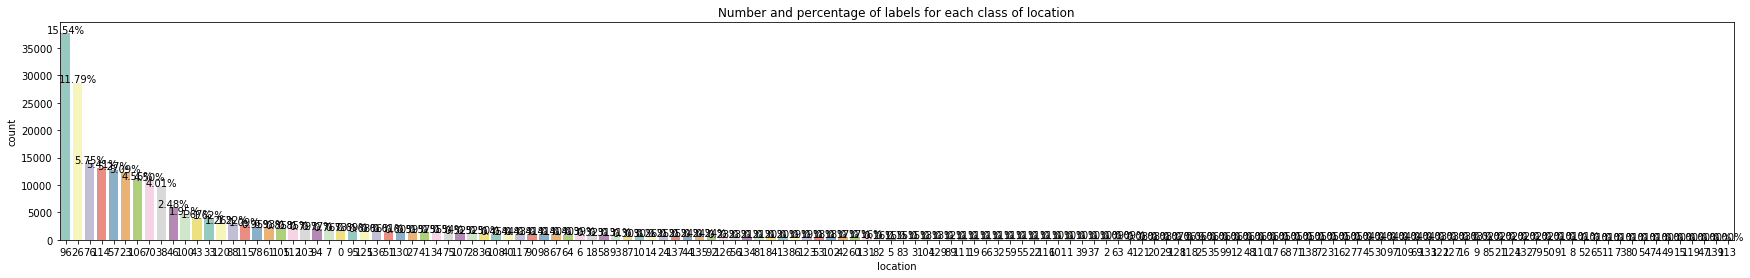

In [38]:
plot_classes('location', fs=15)

Majority of images are from location 96 (18.38%) and 26 (13.95%).

### Number and percentage of labels for each class of Year

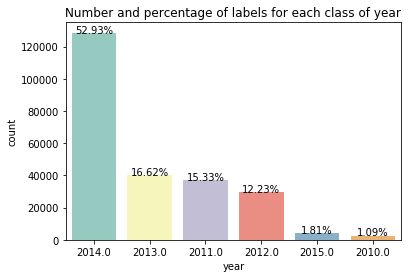

In [74]:
plot_classes('year', fs=3)

### Number and percentage of labels for each class of Month

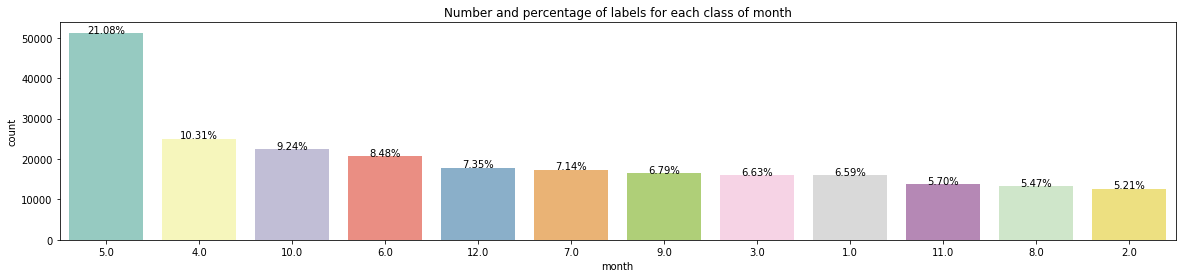

In [76]:
plot_classes('month', fs=10)

### Number and percentage of labels for each class of Hour

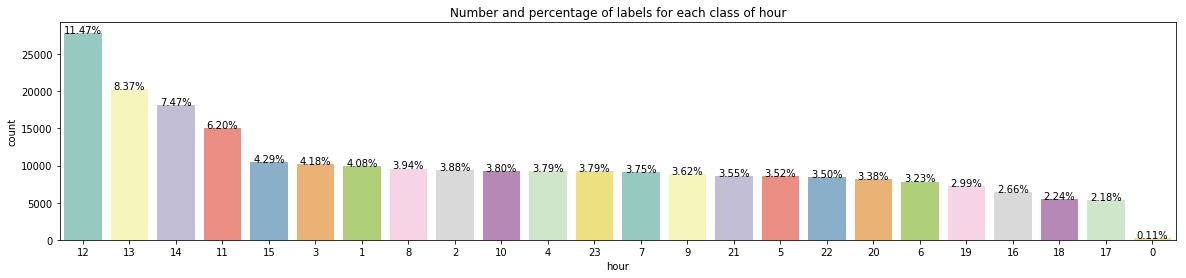

In [78]:
plot_classes('hour', fs=10)

### Number of wild animals observed per hour

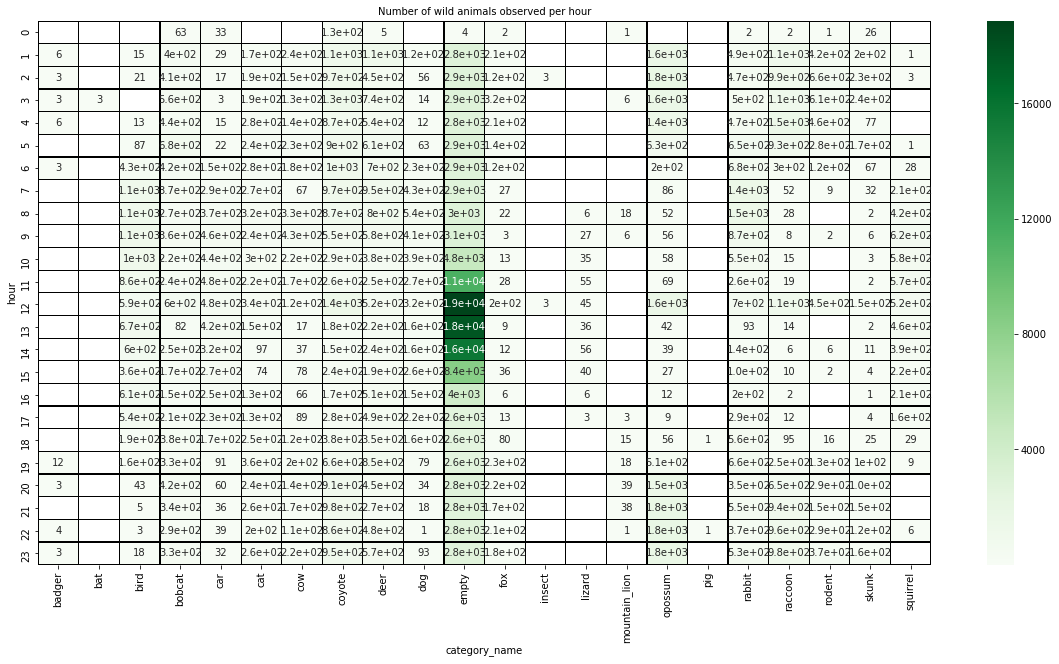

In [85]:
fig, ax = plt.subplots(1,1,figsize=(20,10))
t = pd.DataFrame(image_df_annot.groupby(['category_name', 'hour'])['seq_id'].count().reset_index())
m = t.pivot(index='hour', columns='category_name', values='seq_id')
s = sns.heatmap(m, linewidths=.2, linecolor='black', annot=True, cmap="Greens")
s.set_title('Number of wild animals observed per hour', size=10)
plt.show()

### Number of sequences frames


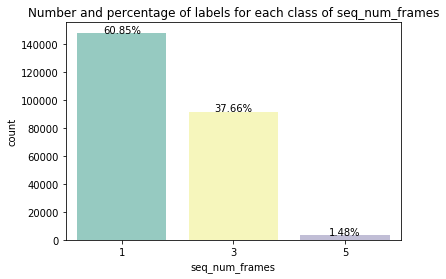

In [39]:
plot_classes('seq_num_frames', fs=3)

Majority of sequence number frames are 1 (61%), followed by 3 (37%), the rest (1.5%) having 5.


### Display sample night images


ValueError: num must be 1 <= num <= 56, not 57

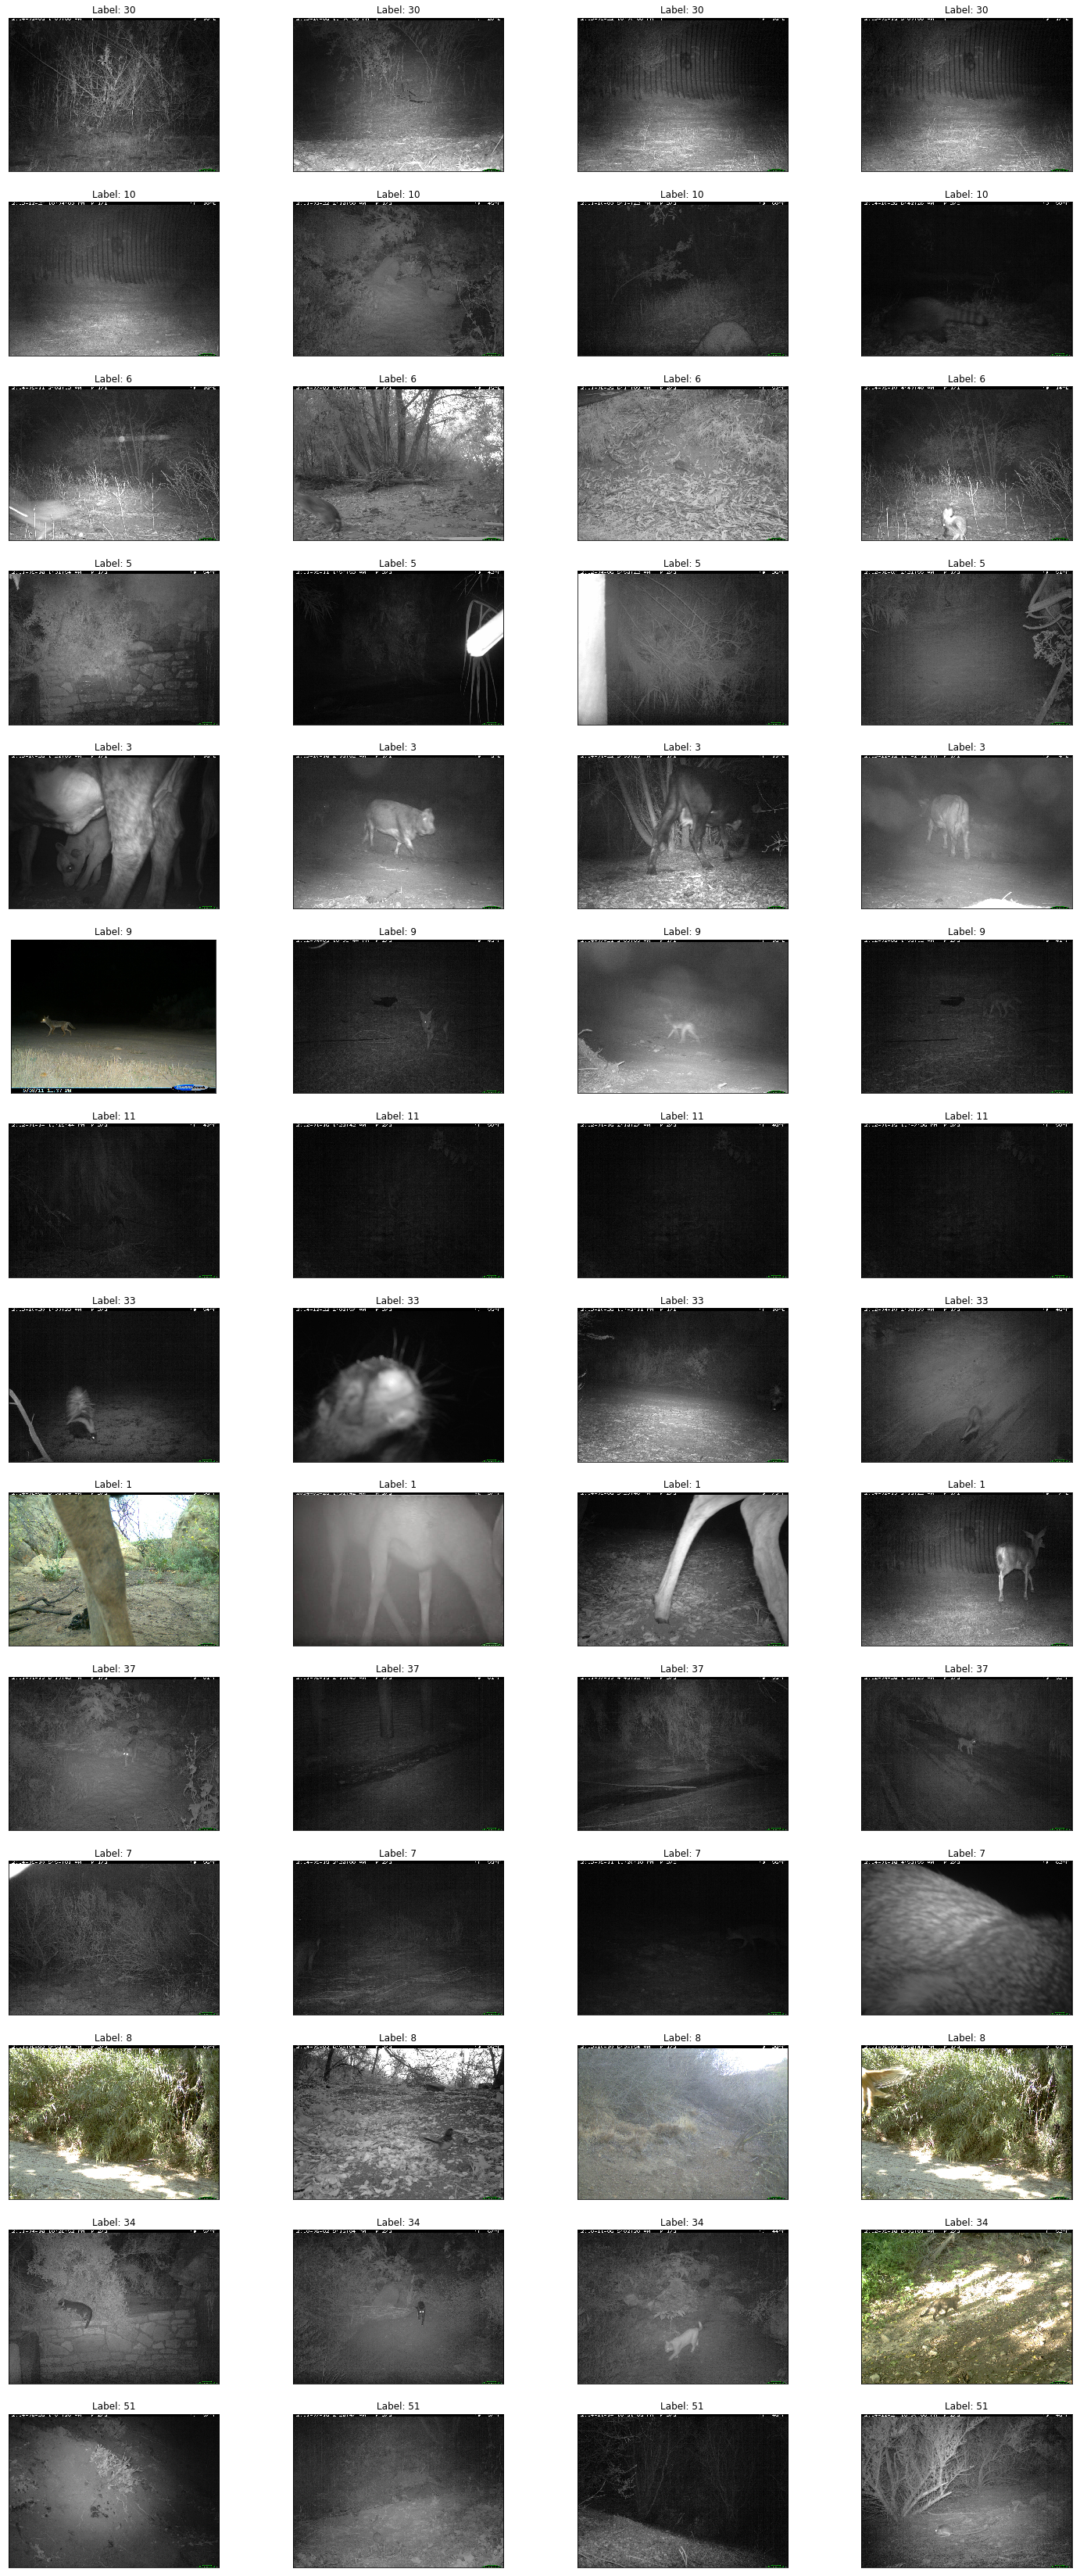

In [63]:
# sample night images
fig = plt.figure(figsize=(25, 60))
imgs = [np.random.choice(night.loc[night['category_id'] == i, 'file_name'], 4) for i in night.category_id.unique()]
imgs = [i for j in imgs for i in j]
labels = [[i] * 4 for i in image_df_annot.category_id.unique()]
labels = [i for j in labels for i in j]
for idx, img in enumerate(imgs):
    ax = fig.add_subplot(14, 4, idx+1, xticks=[], yticks=[])
    head, tail = os.path.split(img)
    im = Image.open('data1/cct_images/'+tail)
    plt.imshow(im)
    ax.set_title(f'Label: {labels[idx]}')

In [67]:
def display_samples(df, columns=4, rows=3):
    fig=plt.figure(figsize=(5*columns, 3*rows))

    for i in range(columns*rows):
        image_path = df.loc[i,'file_name']
        image_id = df.loc[i,'category_id']
        head, tail = os.path.split(image_path)
        img = Image.open('data1/cct_images/'+tail)
        fig.add_subplot(rows, columns, i+1)
        plt.title(image_id)
        plt.imshow(img)

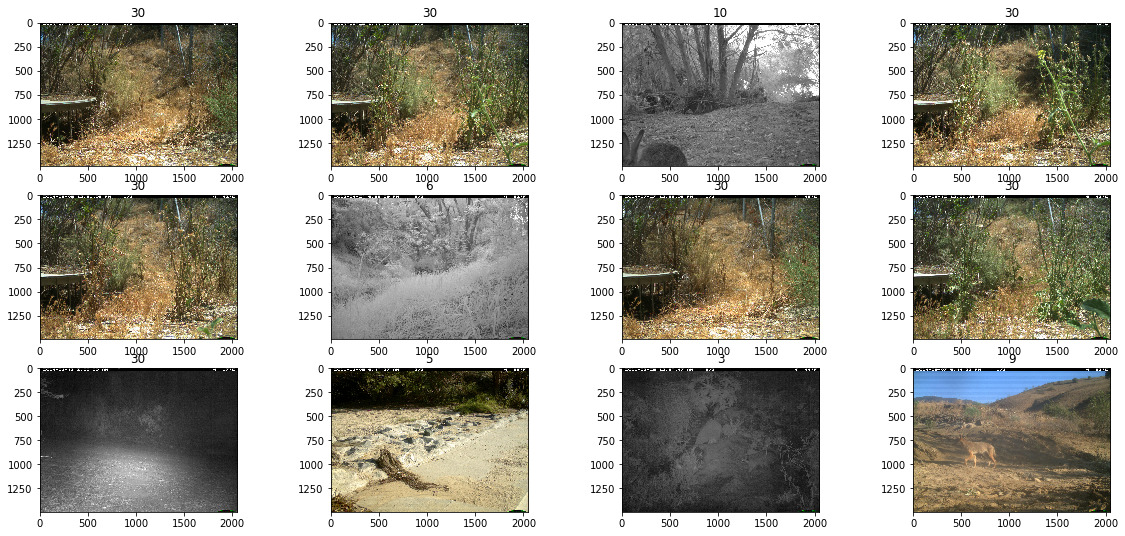

In [68]:
display_samples(image_df_annot)

### Normalize pixel values

In [ ]:
# scale pixels
def prep_pixels(train, test):
    # convert from integers to floats
    train_norm = image_df_annot.astype('float32')
    #test_norm = test.astype('float32')
    # normalize to range 0-1
    train_norm = train_norm / 255.0
    #test_norm = test_norm / 255.0
    # return normalized images
    return train_norm